# Data Filtering
### apply PCA to hog features

In [16]:
import cv2
import os
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nebula.common import to_scale_one, write_pickle, read_pickle, to_pca, display, display_list_color

In [53]:
def display_pca(df, eimgs, save_path):
    shape = df["image"].iloc[0].shape

    oimg_list = [df["image"].iloc[0], df["image"].iloc[5000], df["image"].iloc[10000], df["image"].iloc[15000]]
    eimg_list = [eimgs[i].reshape(shape) for i in range(12)]

    pad_dict=dict(
        left=0,
        bottom=0,
        right=1,
        top=1,
        wspace=0,
        hspace=0
    )

    img_list = oimg_list + eimg_list
    display_list_color(img_list, fr=2, fc=2, nr=4, nc=4, is_gray=True, pad_dict=pad_dict, save_path=save_path)

In [54]:
easy_path = 'C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/image_easy2_df_hog.pkl'
easy_save_path = 'C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/image_easy2_hog_pca_model_res.pkl'
easy_df = read_pickle(easy_path)
easy_df["image"] = easy_df["image"].apply(lambda x: to_scale_one(x, scale=0.5))

if osp.exists(easy_save_path):
    easy_weights, easy_eigen_imgs, easy_pca = read_pickle(easy_save_path)
else:
    easy_weights, easy_eigen_imgs, easy_pca = to_pca(easy_df, n_components=256)

    write_pickle(easy_save_path, (easy_weights, easy_eigen_imgs, easy_pca))

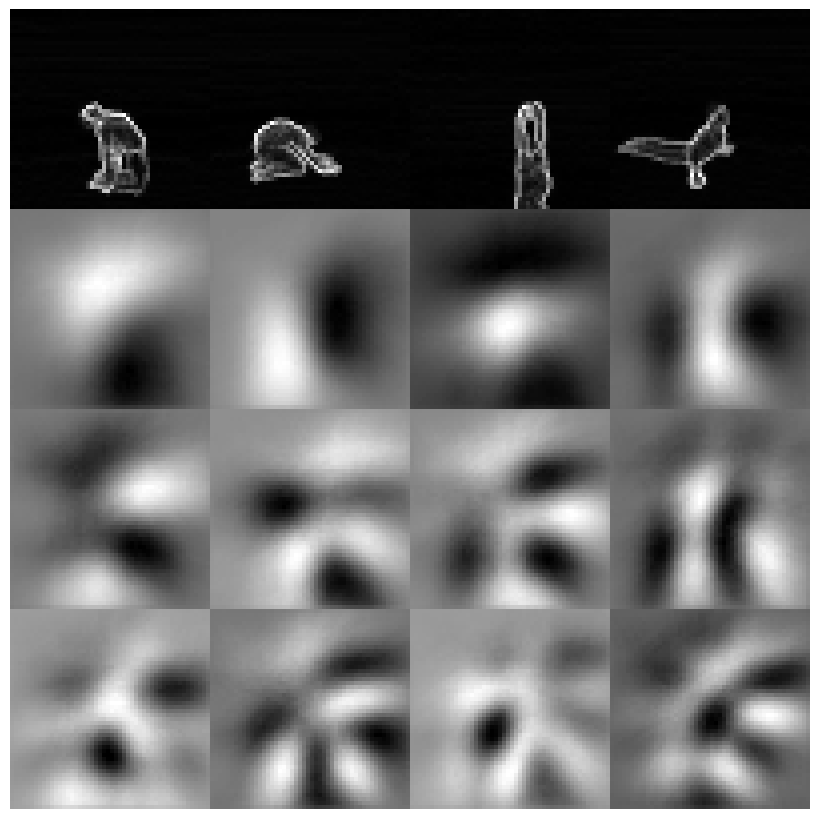

In [55]:
img_save_path = "C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/easy_pca.png"
display_pca(
    easy_df,
    easy_eigen_imgs,
    img_save_path
)

In [56]:
medium_path = 'C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/image_medium_df_hog.pkl'
medium_save_path = 'C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/image_medium_hog_pca_model_res.pkl'
medium_df = read_pickle(medium_path)
medium_df["image"] = medium_df["image"].apply(lambda x: to_scale_one(x, scale=0.5))

if osp.exists(medium_save_path):
    medium_weights, medium_eigen_imgs, medium_pca = read_pickle(medium_save_path)
else:
    medium_weights, medium_eigen_imgs, medium_pca = to_pca(medium_df, n_components=256)

    write_pickle(medium_save_path, (medium_weights, medium_eigen_imgs,medium_pca))

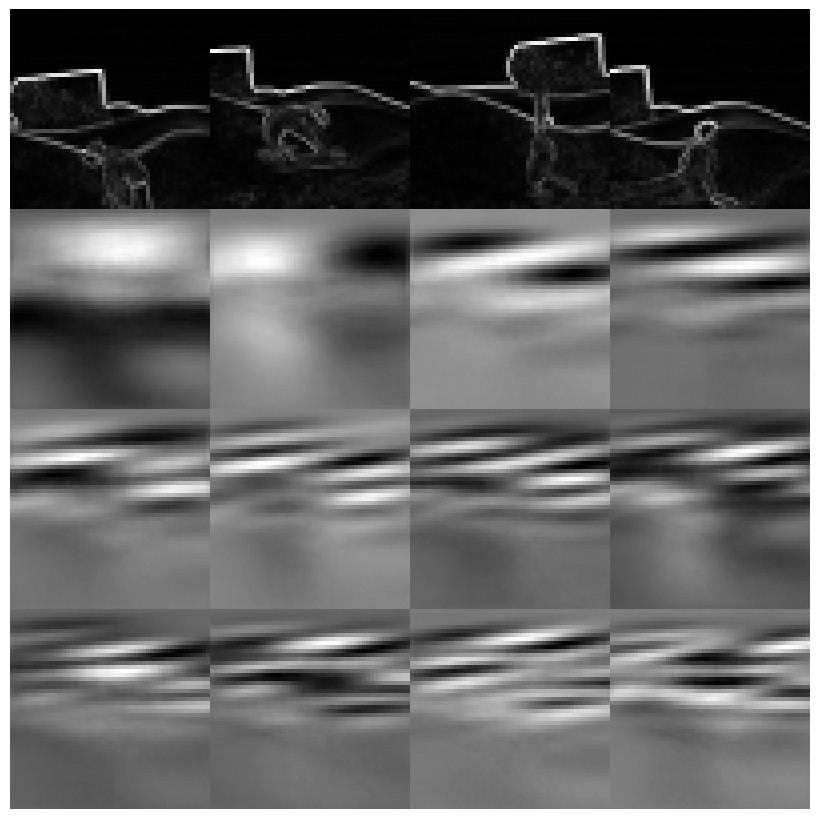

In [57]:
img_save_path = "C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/medium_pca.png"
display_pca(
    medium_df,
    medium_eigen_imgs,
    img_save_path
)